In [1]:
#Import important Python libraries to be used during the analysis of Aerofit dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Read the dataset from local library

df=pd.read_csv("C:/Users/samaksharma/Downloads/Scaler_DS/08_DAV_Fundamentals/Walmart Case Study/walmart.csv")

# 1. Defining Problem Statement and Analyzing basic metrics

Walmart,an American multinational retail corporation wants to analyze the customer purchase behaviour against 
customer's gender, age, marital status.
They would like to understand the spending habits of customers.

# 1a. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [8]:
# Calculate the shape of date

a=df.ndim
b=df.shape
print(f'This is a {a} dimensional dataset.')
print(f'There are {b[0]} rows and {b[1]} columns in this dataset.')

This is a 2 dimensional dataset.
There are 550068 rows and 10 columns in this dataset.


In [9]:
# Glimpse of how the data looks like

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
# Extract datatypes for all fields

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
# Marital Status is present as 0 or 1. Converted this to 'Single' or 'Married'

def marriage_status_convert(x):
    if x==0:
        return 'Single'
    else:
        return 'Married'
df['Marital_Status']=df['Marital_Status'].apply(marriage_status_convert)

- We observe that none of the fields have null values.
- Product_ID, Gender, Age, City_category, Stay_in_Current_city_years, Marital_Status -> String
- User_ID, Occupation, Product_Category, Purchase -> Integer

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [13]:
# To do a statistical analysis, we will convert 'Occupation' and 'Product Category' to string values.

df['Occupation']=df['Occupation'].astype(object)
df['Product_Category']=df['Product_Category'].astype(object)

In [14]:
# Statistical Summary

round(df.describe(),2)

,User_ID,Purchase
count,550068.00,550068.00
mean,1003028.84,9263.97
std,1727.59,5023.07
min,1000001.00,12.00
25%,1001516.00,5823.00
50%,1003077.00,8047.00
75%,1004478.00,12054.00
max,1006040.00,23961.00


- User_ID is an identifier field for customers. Analyzing the statistics for this will not add value to the analysis.
- Mean purchase amount per transaction is 9263, while the median amount is 8047.
- Minimum value of a transaction is 12 and maximum is 23,961.

In [15]:
# Statistical Summary for String

df.describe(include=object)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,Single,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


- P00265242 is the maximum bought product by customers. There are 3631 unique products purchased.
- Out of 550K of data, 414K transactions are done by males while remaining 135K are from females.
- There are 7 age brackets in which customers are grouped in. Most of the customers are from age bracket 26-35.
- There are 21 unique occupations of which customers from occupation 4 are biggest consumers.
- There are 3 city categories, namely A, B and C. There are 231173 transactions done by customers from city category B.
- 324K trasactions were completed by Single. While the remaining 250K were carried out by Married.
- Of the 20 unique product categories, category 5 was purchased 150K times.

# 1b. Non-Graphical Analysis: Value counts and unique attributes

In [16]:
# Analysing User ID column

a=df['User_ID'].nunique()
print(f'There are {a} user ids in the dataset.')
df['User_ID'].value_counts()

There are 5891 user ids in the dataset.


1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

- There are total 5891 unique users who have done the transaction.
- User ID '1001680' has done the maximum transactions i.e. 1026 times.

In [17]:
# Analysing Product ID column

a=df['Product_ID'].nunique()
print(f'There are {a} product ids in the dataset.')
df['Product_ID'].value_counts()

There are 3631 product ids in the dataset.


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

- There are total 3631 unique products which were bought by the customers.
- Product ID 'P00265242' was bought the most number of times.

In [18]:
# Analysing Gender column

df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

- 75% of the transactions were done by males

In [19]:
# Analysing Age column

a=df['Age'].nunique()
print(f'Customers belong to {a} age ranges in the dataset.')
df['Age'].value_counts()

Customers belong to 7 age ranges in the dataset.


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

- Of the 7 age barackets, most of the customers belonged to the age of 26 to 35 years.

In [20]:
# Analysing Occupation column

a=df['Occupation'].nunique()
print(f'Customers belong to {a} occupations in the dataset.')
df['Occupation'].value_counts()

Customers belong to 21 occupations in the dataset.


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

- There are 21 occupations of the customers and 36% of them are employed in occupation 4,0 and 7.

In [21]:
# Analysing City Category column

a=df['City_Category'].unique()
b=df['City_Category'].nunique()
print(f'There are {b} city categories in the dataset namely {a[0]}, {a[2]} and {a[1]}.')
df['City_Category'].value_counts()

There are 3 city categories in the dataset namely A, B and C.


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

- 42% of the consumers belong to city category B.

In [22]:
# Analysing Staying in Current City column

a=df['Stay_In_Current_City_Years'].unique()
b=df['Stay_In_Current_City_Years'].nunique()
print(f'Customers staying in the current city are splitted into {b} categories, namely {a[4]}, {a[3]}, {a[0]}, {a[2]} and {a[1]}.')
df['Stay_In_Current_City_Years'].value_counts()

Customers staying in the current city are splitted into 5 categories, namely 0, 1, 2, 3 and 4+.


1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

- 53% of the consumers have been staying in the city for 1-2 years.

In [23]:
# Analysing Marital Status column

df['Marital_Status'].value_counts()

Single     324731
Married    225337
Name: Marital_Status, dtype: int64

- 60% of the consumers are single.

In [24]:
# Analysing Product Category column

a=df['Product_Category'].nunique()
print(f'There are {a} product categories in the dataset.')
df['Product_Category'].value_counts()

There are 20 product categories in the dataset.


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

- 73.7% of the product categores belong to 5,1 and 8

In [25]:
# Analysing Purchase column

print(f'The total amount for which purchases were done is {df["Purchase"].sum()}')
print(f'The minimum purchase amount is {df["Purchase"].min()}')
print(f'The maximum purchase amount is {df["Purchase"].max()}')
print(f'The average amount for which purchases were done is {round(df["Purchase"].mean(),0)}')
print(f'The median amount for which purchases were done is {round(df["Purchase"].median(),0)}')

The total amount for which purchases were done is 5095812742
The minimum purchase amount is 12
The maximum purchase amount is 23961
The average amount for which purchases were done is 9264.0
The median amount for which purchases were done is 8047.0


# 1c. Visual Analysis - Univariate & Bivariate
    - For continuous variable(s): Distplot, countplot, histogram for univariate analysis
    - For categorical variable(s): Boxplot
    - For correlation: Heatmaps, Pairplots

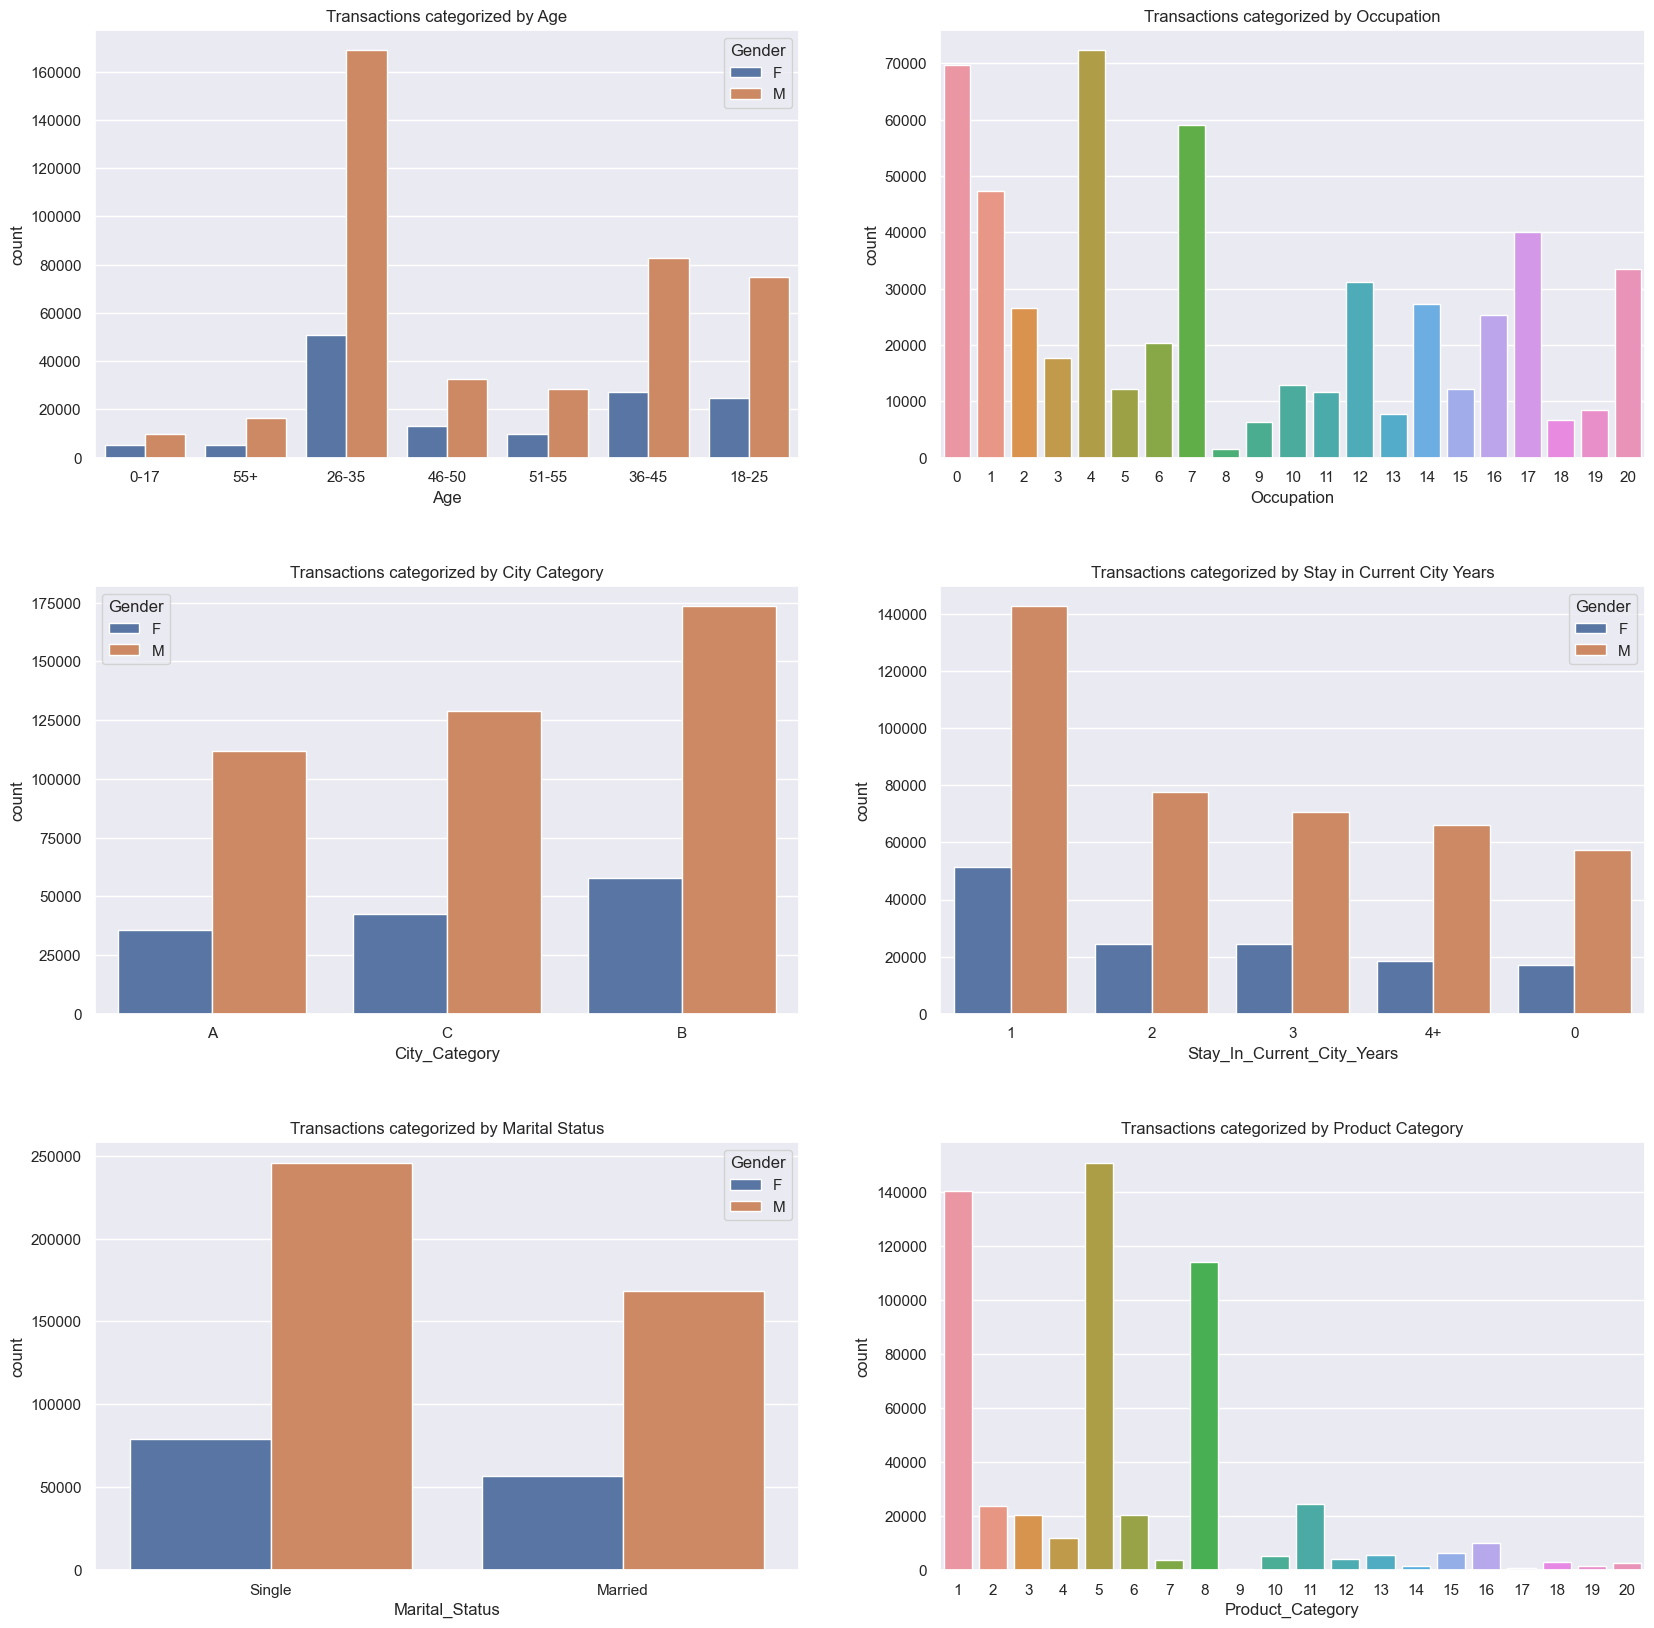

In [49]:
# Countplot to compare the transactions count by age, occupation, City category, Stay in Current City, Marital status,
# and Product category

sns.set_theme()

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title('Transactions categorized by Age')
sns.countplot(x="Age",hue="Gender",data=df)

plt.subplot(3,2,2)
plt.title('Transactions categorized by Occupation')
sns.countplot(x="Occupation",data=df)

plt.subplot(3,2,3)
plt.title('Transactions categorized by City Category')
sns.countplot(x="City_Category",hue="Gender",data=df)

plt.subplot(3,2,4)
plt.title('Transactions categorized by Stay in Current City Years')
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender",data=df,order=df['Stay_In_Current_City_Years'].value_counts().index)

plt.subplot(3,2,5)
plt.title('Transactions categorized by Marital Status')
sns.countplot(x="Marital_Status",hue="Gender",data=df)

plt.subplot(3,2,6)
plt.title('Transactions categorized by Product Category')
sns.countplot(x="Product_Category",data=df)

plt.subplots_adjust(hspace=0.3)
plt.show()

- Males have done more transactions than females.
- Most of the transactions were done by customers in the age bracket of 26-35
- Customers employed in occupation 4,0 and 7 have performed the maximum number of transactions
- Maximum number of transactions are done by customers from city category B
- Maximum number of transactions are done by customers who have been living in the current city for an year
- Customers with marital status as 'Single' have deone more transactions than 'Married'
- Products from category 5, 1 and 8 are purchased the most number of times.

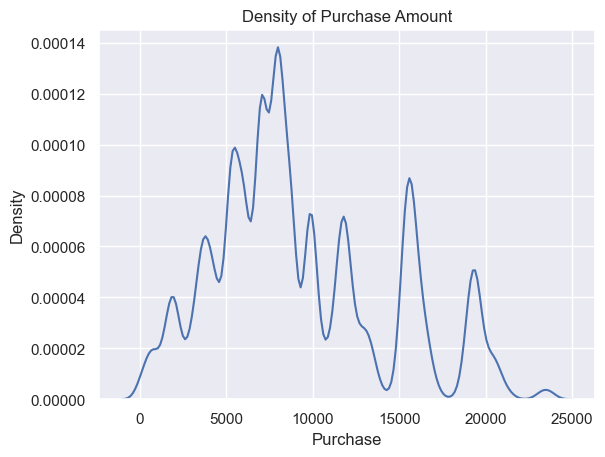

In [112]:
# Generate KDEplot to see the pattern of transactions with purchase amount

plt.title('Density of Purchase Amount')
sns.kdeplot(df['Purchase'])
plt.show()

- As observed in the above graph, maximum transactions have a purchase value of 7k-9k.

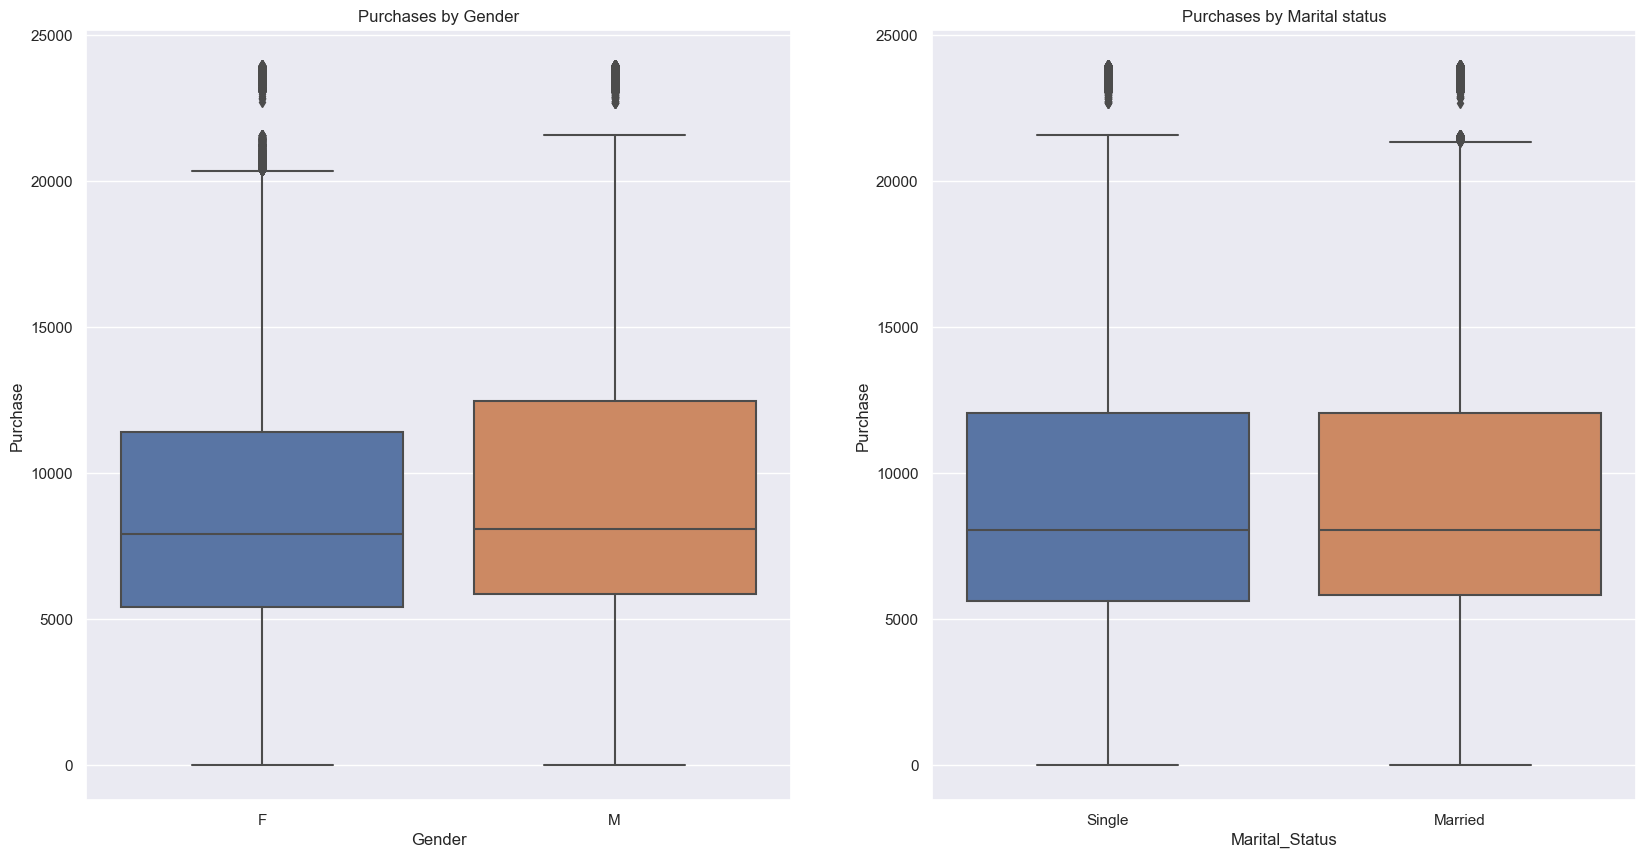

In [118]:
# Generate boxplot to compare the purchase done by gender and marital status

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Purchases by Gender')
sns.boxplot(x="Gender",y="Purchase",data=df)

plt.subplot(1,2,2)
plt.title('Purchases by Marital status')
sns.boxplot(x="Marital_Status",y="Purchase",data=df)

plt.show()

- The median transaction value for male and female is almost equal. Though, we see more outliers for females.
- Same goes for marital status as well. The median purchase value per transaction is equal for Singles and married.

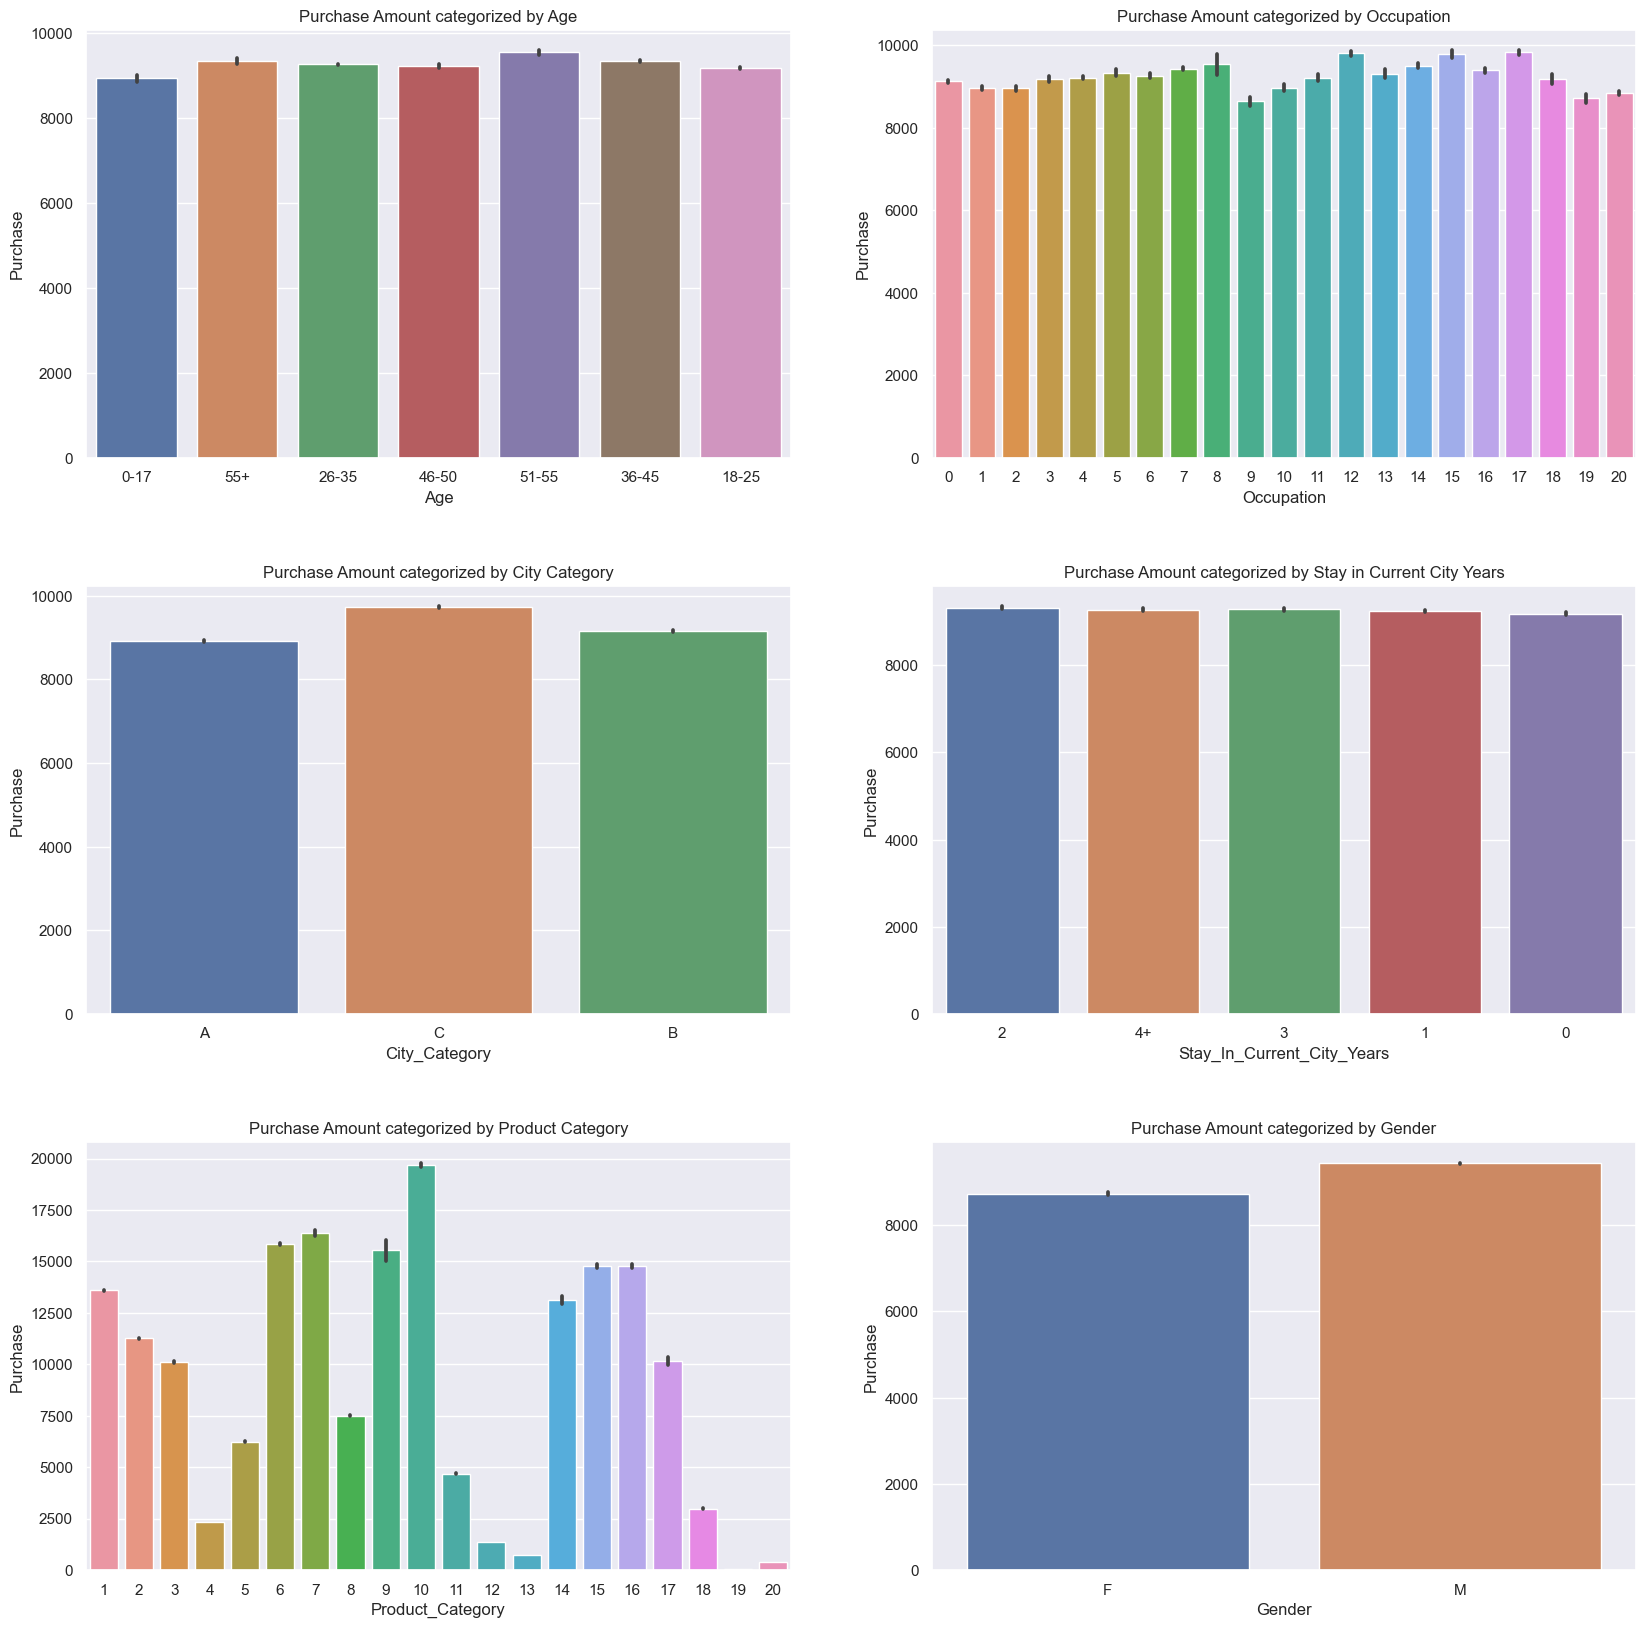

In [138]:
# Bivariate Analysis

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title('Purchase Amount categorized by Age')
sns.barplot(x="Age",y="Purchase",data=df)

plt.subplot(3,2,2)
plt.title('Purchase Amount categorized by Occupation')
sns.barplot(x="Occupation",y="Purchase",data=df)

plt.subplot(3,2,3)
plt.title('Purchase Amount categorized by City Category')
sns.barplot(x="City_Category",y="Purchase",data=df)

plt.subplot(3,2,4)
plt.title('Purchase Amount categorized by Stay in Current City Years')
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",data=df)

plt.subplot(3,2,5)
plt.title('Purchase Amount categorized by Product Category')
sns.barplot(x="Product_Category",y="Purchase",data=df)

plt.subplot(3,2,6)
plt.title('Purchase Amount categorized by Gender')
sns.barplot(x="Gender",y="Purchase",data=df)

plt.subplots_adjust(hspace=0.3)
plt.show()

- The average purchase value for each group is almost same across. Customers from age group 51-55 have a 
  higher mean purchase value as compared to others.
- Customers employed in occupation 9 have a lower mean purchase value as compared to other occupations.
- Though customers from city category B have made maximum number of transactions, but customers from C have
  a higher mean purchase value
- Product Category 10 has a very high mean purchase value. While, product category 19, 20, 13 and 12 have very low
  average purchase value
- Mean purchase value for married and singlem customers is same.

# 2. Missing Value & Outlier Detection

In [124]:
# Detect missing values

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

As we see in the output, there are no missing values in the dataset

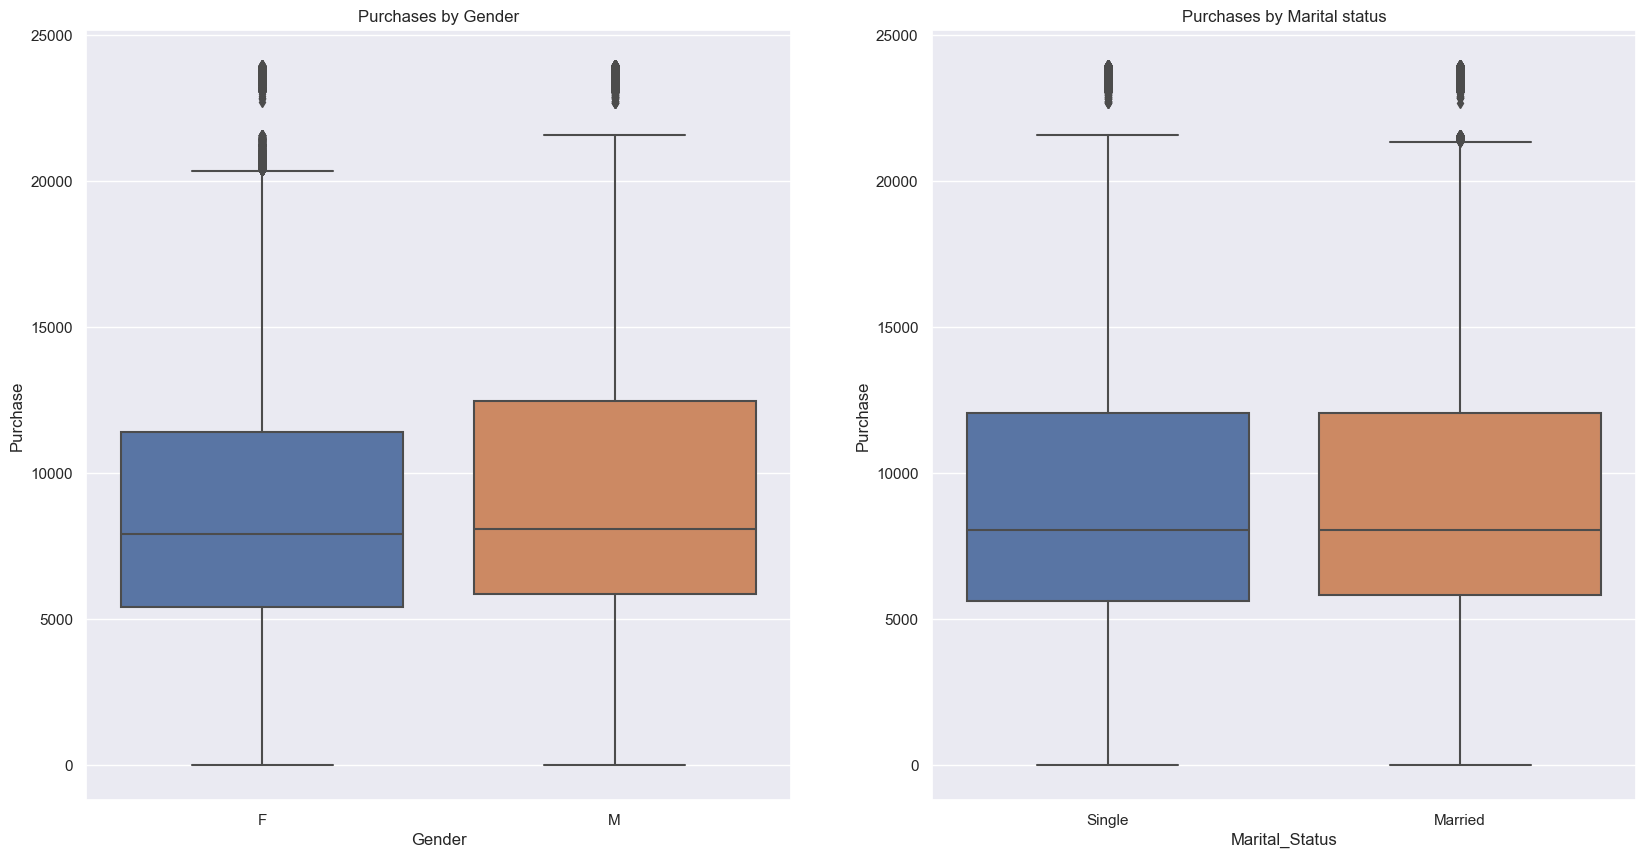

In [125]:
# Outlier Detetction

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Purchases by Gender')
sns.boxplot(x="Gender",y="Purchase",data=df)

plt.subplot(1,2,2)
plt.title('Purchases by Marital status')
sns.boxplot(x="Marital_Status",y="Purchase",data=df)

plt.show()

- There are more outliers for females with respect to transaction amount
- There are more outliers for married with respect to transaction amount

# 3. Business Insights based on Non- Graphical and Visual Analysis

Comments on the range of attributes, distribution of variables and relationship between them:
    
- The user_id column is not the primary identifier as  single user has bought multiple products and this dataset 
  is at the transaction level. There are 5891 unique customers who have made the purchase.
  User_id '1001680' has done maximum transactions i.e. 1026 and user_id 1000708 has done minimum transactions i.e. 6.

- Of 3631 products, Product 'P00265242' has been bought most number of times (1880).

- Gender has 2 values. M for male and F for female. 75% of the transactions are done by males.

- There are 7 age groups in which the customers are grouped in. Maximum number of transactions are done by people 
  in the age group of 26-35.

- There are 21 occupations in which customers are employed ranging from 0 to 20.

- There are 3 city categories A,B and C with most number of transactions happening in B.

- Customers are grouped in 5 categories of stay in current city in years from 0 to 4+.
  53% of the consumers have been staying in the city for 1-2 years.

- Customers are either single or married. 60% of the purchase is done by singles.

- There are 20 product categories from 1 to 20. Product category '5' has the maximum number of transactions
  i.e 150K and category '9' has the lowest number of purchases i.e. 410.
- 5.01 B sales were done on Black friday sale. The mean value of each transaction is 9.2K.
  Minimum value of a transaction was 12 and maximum purchase sale was 24K.

Comments for each univariate and bivariate plot:

- Males have done more transactions than females. The mean transaction value for male is higher than females.
  
- Most of the transactions were done by customers in the age bracket of 26-35. The average purchase value for each group is 
  same. Customers from age group 51-55 have a higher mean purchase value as compared to others.
  
- Customers employed in occupation 4,0 and 7 have performed the maximum number of transactions.
  Customers employed in occupation 9 have a lower mean purchase value as compared to other occupations.
  
- Maximum number of transactions are done by customers from city category B though, customers from C have a 
  higher mean purchase sale.
  
- Maximum number of transactions are done by customers who have been living in the current city for an year
  
- Customers with marital status as 'Single' have deone more transactions than 'Married' though the average
  purchase sale is equal for both the categories.
  
- Products from category 5, 1 and 8 are purchased the most number of times.
  Product Category 10 has a very high mean purchase value. While, product category 19, 20, 13 and 12 have
  very low average purchase value.
  
- Majority of the transactions have a purchase value of 7k-9k.

# 4. Answering questions

# 4a. Are women spending more money per transaction than men? Why or Why not?

In [26]:
# Create a list of men and women with their purchase value

male_purchase_list=np.array(df[df['Gender']=='M']['Purchase'])
female_purchase_list=np.array(df[df['Gender']=='F']['Purchase'])

In [27]:
# Calculate the mean purchase value for men and women

a=round(np.mean(male_purchase_list),0)
b=round(np.mean(female_purchase_list),0)
print(f"The average purchase value of a transaction done by men is {a}")
print(f"The average purchase value of a transaction done by women is {b}")
print()
if (a>b):
    print("Men are spending more than women per transaction")
else:
    print("Women are spending more than men per transaction")

The average purchase value of a transaction done by men is 9438.0
The average purchase value of a transaction done by women is 8735.0

Men are spending more than women per transaction


As seen the mean value of transaction is more for men then women. Therefore, men are spending
more than women per transaction.

# 4b. Confidence intervals and distribution of the mean of the expenses by female and male customers

We will calculate the confidence interval for mean purchase done by men by taking different sample sizes
and using bootstrapping principle

In [28]:
# Create a function 'calcmean' to calculate the list of means of purchase for sample

def calcmean(n,samples,purchase_list):
    boot_sample_mean_lst=[]
    for reps in range(samples):
        boot_sample=np.random.choice(purchase_list,size=n)
        boot_sample_mean=np.mean(boot_sample)
        boot_sample_mean_lst.append(boot_sample_mean)
    return boot_sample_mean_lst

The mean value for 10k samples of size 1000 for men purchase transactions is 9436.87

The 99% confidence interval when taking above men sample is 9066.26 to 9816.27

The 95% confidence interval when taking above men sample is 9176.4 to 9702.78

The 90% confidence interval when taking above men sample is 9233.53 to 9644.79



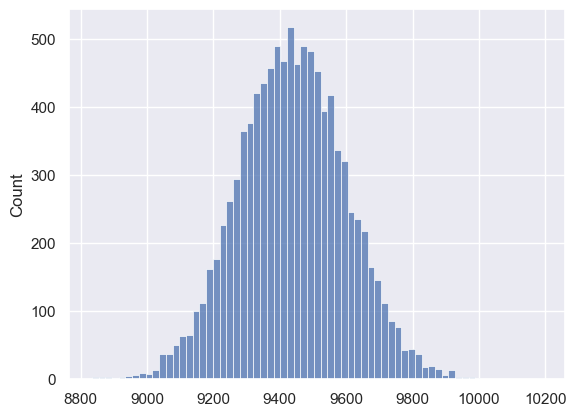

In [50]:
# Create a list for men using 10k samples with sample size 1000 and calculate mean

sample_men_list_1k=calcmean(n=1000,samples=10000,purchase_list=male_purchase_list)
men_mean=round(np.mean(sample_men_list_1k),2)
print(f"The mean value for 10k samples of size 1000 for men purchase transactions is {men_mean}")
print()
conf_lower=round(np.percentile(sample_men_list_1k,1.0),2)
conf_upper=round(np.percentile(sample_men_list_1k,99.0),2)
print(f"The 99% confidence interval when taking above men sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_men_list_1k,5.0),2)
conf_upper=round(np.percentile(sample_men_list_1k,95.0),2)
print(f"The 95% confidence interval when taking above men sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_men_list_1k,10.0),2)
conf_upper=round(np.percentile(sample_men_list_1k,90.0),2)
print(f"The 90% confidence interval when taking above men sample is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_men_list_1k)
plt.show()

The mean value for 10k samples of size 10k for men purchase transactions is 9437.94

The 99% confidence interval when taking above men sample is 9322.99 to 9559.16

The 95% confidence interval when taking above men sample is 9354.14 to 9522.92

The 90% confidence interval when taking above men sample is 9372.14 to 9502.98



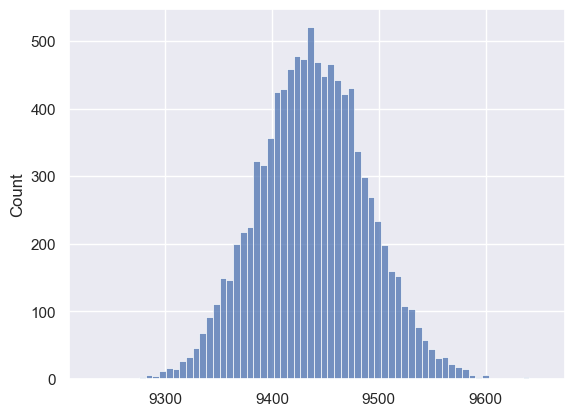

In [51]:
# Create a list for men using 10k samples with sample size 10k and calculate mean

sample_men_list_10k=calcmean(n=10000,samples=10000,purchase_list=male_purchase_list)
men_mean=round(np.mean(sample_men_list_10k),2)
print(f"The mean value for 10k samples of size 10k for men purchase transactions is {men_mean}")
print()
conf_lower=round(np.percentile(sample_men_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_men_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above men sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_men_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_men_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above men sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_men_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_men_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above men sample is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_men_list_10k)
plt.show()

- The mean purchase value per transaction for men from the original dataset was 9438.
- When we took a sample size of 1000, the mean value was 9434 and when we took the sample size of 10000,
  the mean purchase value was 9437 which is very close to the original mean.
- By using 10k sample size, we can confirm the 90% confidence interval for men average purchase value will be
  9371 to 9503.
- We can also confirm the 95% confidence interval and 99% confidence interval for men average purchase value will be
  9353 to 9522 and 9315 to 9559 respectively.

The mean value for 10k samples of size 1000 for women purchase transactions is 8735.62

The 99% confidence interval when taking above women sample is 8390.65 to 9088.91

The 95% confidence interval when taking above women sample is 8491.34 to 8983.85

The 90% confidence interval when taking above women sample is 8544.5 to 8928.51



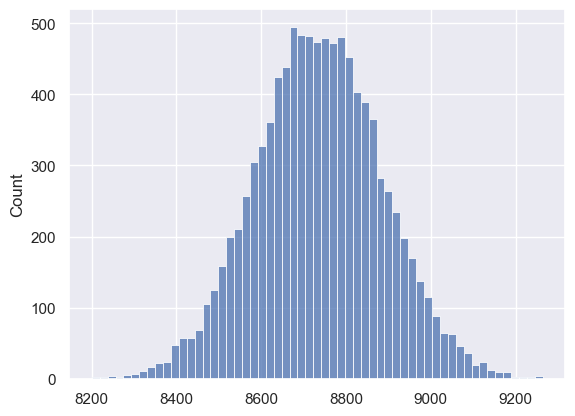

In [52]:
# Create a list for women using 10k samples with sample size 1000 and calculate mean

sample_women_list_1k=calcmean(n=1000,samples=10000,purchase_list=female_purchase_list)
women_mean=round(np.mean(sample_women_list_1k),2)
print(f"The mean value for 10k samples of size 1000 for women purchase transactions is {women_mean}")
print()
conf_lower=round(np.percentile(sample_women_list_1k,1.0),2)
conf_upper=round(np.percentile(sample_women_list_1k,99.0),2)
print(f"The 99% confidence interval when taking above women sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_women_list_1k,5.0),2)
conf_upper=round(np.percentile(sample_women_list_1k,95.0),2)
print(f"The 95% confidence interval when taking above women sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_women_list_1k,10.0),2)
conf_upper=round(np.percentile(sample_women_list_1k,90.0),2)
print(f"The 90% confidence interval when taking above women sample is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_women_list_1k)
plt.show()

The mean value for 10k samples of size 10k for women purchase transactions is 8735.6

The 99% confidence interval when taking above women sample is 8625.08 to 8845.17

The 95% confidence interval when taking above women sample is 8657.59 to 8813.98

The 90% confidence interval when taking above women sample is 8674.54 to 8796.59



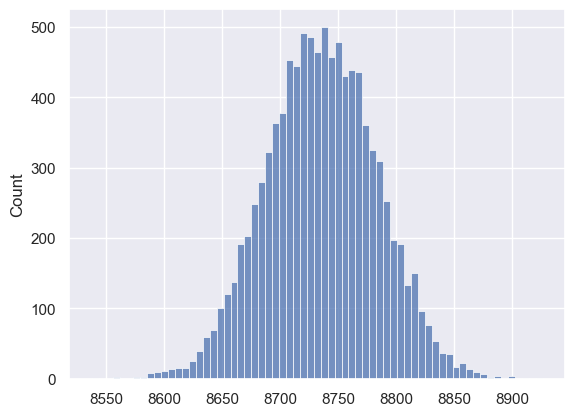

In [53]:
# Create a list for women using 10k samples with sample size 10k and calculate mean

sample_women_list_10k=calcmean(n=10000,samples=10000,purchase_list=female_purchase_list)
women_mean=round(np.mean(sample_women_list_10k),2)
print(f"The mean value for 10k samples of size 10k for women purchase transactions is {women_mean}")
print()
conf_lower=round(np.percentile(sample_women_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_women_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above women sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_women_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_women_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above women sample is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_women_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_women_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above women sample is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_women_list_10k)
plt.show()

- The mean purchase value per transaction for women from the original dataset was 8735.
- When we took a sample size of 1000, the mean value was 8732 and when we took the sample size of 10000,
  the mean purchase value was 8735 which is equal to the original mean.
- By using 10k sample size, we can confirm the 90% confidence interval for women average purchase value
  will be 8673 to 8797.
- We can also confirm the 95% confidence interval and 99% confidence interval for women average
  purchase value will be 8655 to 8814 and 8627 to 8846 respectively.

# 4c. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

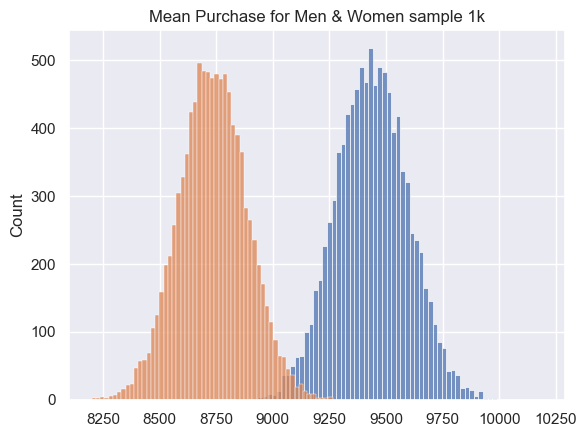

In [55]:
# Create the Gaussian distribution graph when we have 10k samples of 1k sample size

plt.title('Mean Purchase for Men & Women sample 1k')
sns.histplot(sample_men_list_1k)
sns.histplot(sample_women_list_1k)
plt.show()

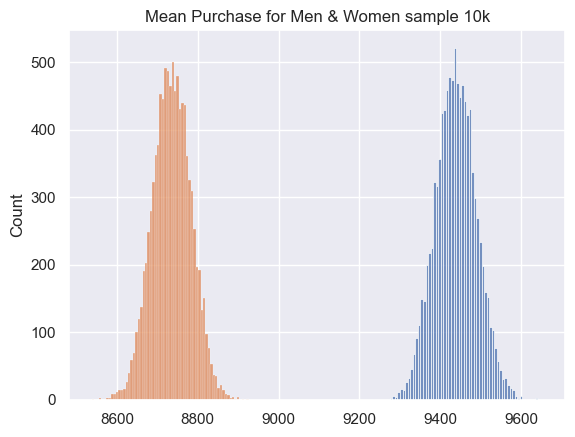

In [56]:
# Create the Gaussian distribution graph when we have 10k samples of 10k sample size

plt.title('Mean Purchase for Men & Women sample 10k')
sns.histplot(sample_men_list_10k)
sns.histplot(sample_women_list_10k)
plt.show()

- As per our analysis, the confidence interval for purchase value will overlap for men and women when we take
  sample size of 1000. The overlap happens when we take 99% confidence interval.
- When we take the sample size as 10k, the confidence interval does not overlap
- By this analysis, we can confirm that the purchase per transaction for women will be less than men.
  Walmart should take this consideration and have more women oriented products. They can offer promotional discounts
  on such products so that purchase value for women can be increased.

# 4d. Results when the same activity is performed for Married vs Unmarried

In [59]:
# Create a list of single and married with their purchase value

single_purchase_list=np.array(df[df['Marital_Status']=='Single']['Purchase'])
married_purchase_list=np.array(df[df['Marital_Status']=='Married']['Purchase'])

In [62]:
# Calculate the mean purchase value for single and married

x=round(np.mean(single_purchase_list),0)
y=round(np.mean(married_purchase_list),0)
print(f"The average purchase value of a transaction done by singles is {x}")
print(f"The average purchase value of a transaction done by married is {y}")
print()
if (x>y):
    print("Singles are spending more than married per transaction")
else:
    print("Married are spending more than Singles per transaction")

The average purchase value of a transaction done by singles is 9266.0
The average purchase value of a transaction done by married is 9261.0

Singles are spending more than married per transaction


As seen the mean value of transaction is very slightly more for singles than married. Thereby, we can say that the average purchase value is almost equal for singles and married.

The mean purchase value for 10k samples of size 1000 for singles is 9262.15

The 99% confidence interval when taking above sample for singles is 8899.61 to 9630.13

The 95% confidence interval when taking above sample for singles is 9003.49 to 9519.25

The 90% confidence interval when taking above sample for single is 9063.32 to 9462.52



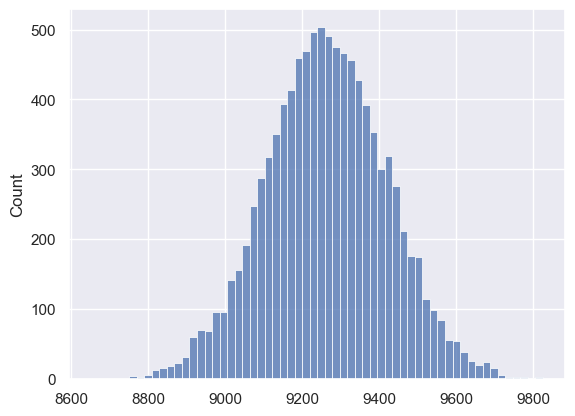

In [65]:
# Create a list for singles using 10k samples with sample size 1000 and calculate mean

sample_single_list_1k=calcmean(n=1000,samples=10000,purchase_list=single_purchase_list)
single_mean=round(np.mean(sample_single_list_1k),2)
print(f"The mean purchase value for 10k samples of size 1000 for singles is {single_mean}")
print()
conf_lower=round(np.percentile(sample_single_list_1k,1.0),2)
conf_upper=round(np.percentile(sample_single_list_1k,99.0),2)
print(f"The 99% confidence interval when taking above sample for singles is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_single_list_1k,5.0),2)
conf_upper=round(np.percentile(sample_single_list_1k,95.0),2)
print(f"The 95% confidence interval when taking above sample for singles is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_single_list_1k,10.0),2)
conf_upper=round(np.percentile(sample_single_list_1k,90.0),2)
print(f"The 90% confidence interval when taking above sample for single is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_single_list_1k)
plt.show()

The mean purchase value for 10k samples of size 10k for singles is 9265.32

The 99% confidence interval when taking above sample for singles is 9148.88 to 9379.69

The 95% confidence interval when taking above sample for singles is 9182.82 to 9347.34

The 90% confidence interval when taking above sample for single is 9200.59 to 9329.04



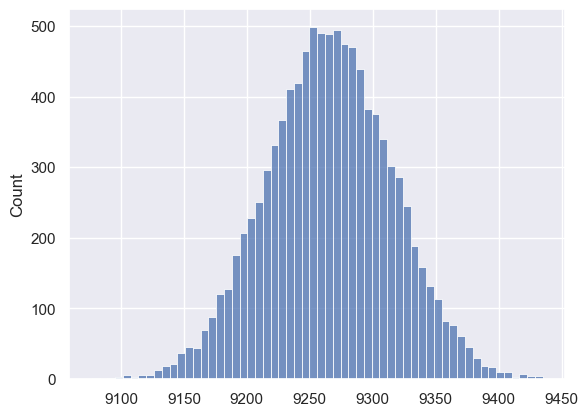

In [66]:
# Create a list for singles using 10k samples with sample size 10k and calculate mean

sample_single_list_10k=calcmean(n=10000,samples=10000,purchase_list=single_purchase_list)
single_mean=round(np.mean(sample_single_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for singles is {single_mean}")
print()
conf_lower=round(np.percentile(sample_single_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_single_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for singles is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_single_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_single_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for singles is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_single_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_single_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for single is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_single_list_10k)
plt.show()

- The mean purchase value per transaction for singles from the original dataset was 9266.
- When we took a sample size of 1000, the mean value was 9262 and when we took the sample size of 10000, the mean purchase value was 9265 which is very close to the original mean.
- By using 10k sample size, we can confirm the 90% confidence interval for single's average purchase value will be 9200 to  9329.
- We can also confirm the 95% confidence interval and 99% confidence interval for singles average purchase value will be 9183 to 9347 and 9149 to 9380 respectively.

The mean purchase value for 10k samples of size 1000 for married is 9259.41

The 99% confidence interval when taking above sample for married is 8898.29 to 9629.0

The 95% confidence interval when taking above sample for married is 9000.56 to 9521.44

The 90% confidence interval when taking above sample for married is 9056.74 to 9461.38



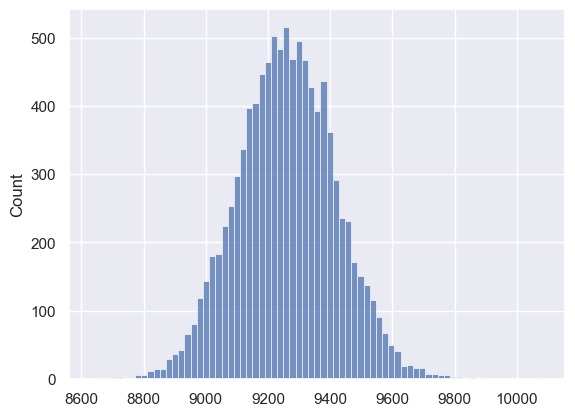

In [68]:
# Create a list for married using 10k samples with sample size 1000 and calculate mean

sample_married_list_1k=calcmean(n=1000,samples=10000,purchase_list=married_purchase_list)
married_mean=round(np.mean(sample_married_list_1k),2)
print(f"The mean purchase value for 10k samples of size 1000 for married is {married_mean}")
print()
conf_lower=round(np.percentile(sample_married_list_1k,1.0),2)
conf_upper=round(np.percentile(sample_married_list_1k,99.0),2)
print(f"The 99% confidence interval when taking above sample for married is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_married_list_1k,5.0),2)
conf_upper=round(np.percentile(sample_married_list_1k,95.0),2)
print(f"The 95% confidence interval when taking above sample for married is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_married_list_1k,10.0),2)
conf_upper=round(np.percentile(sample_married_list_1k,90.0),2)
print(f"The 90% confidence interval when taking above sample for married is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_married_list_1k)
plt.show()

The mean purchase value for 10k samples of size 10k for married is 9261.37

The 99% confidence interval when taking above sample for married is 9147.76 to 9376.21

The 95% confidence interval when taking above sample for married is 9179.51 to 9344.14

The 90% confidence interval when taking above sample for married is 9197.17 to 9325.42



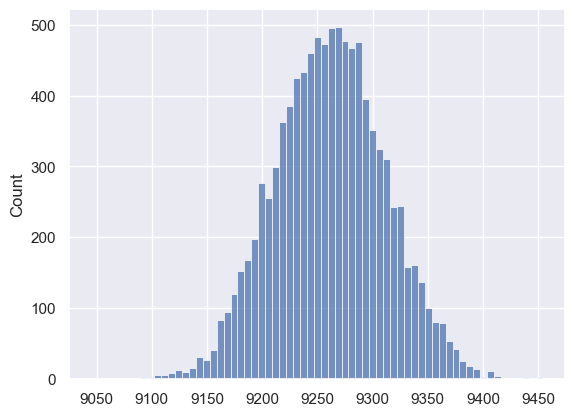

In [76]:
# Create a list for married using 10k samples with sample size 10k and calculate mean

sample_married_list_10k=calcmean(n=10000,samples=10000,purchase_list=married_purchase_list)
married_mean=round(np.mean(sample_married_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for married is {married_mean}")
print()
conf_lower=round(np.percentile(sample_married_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_married_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for married is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_married_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_married_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for married is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_married_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_married_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for married is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_married_list_10k)
plt.show()

- The mean purchase value per transaction for married from the original dataset was 9262.
- When we took a sample size of 1000, the mean value was 9259 and when we took the sample size of 10000, the mean purchase value was 9261 which is very close to the original mean.
- By using 10k sample size, we can confirm the 90% confidence interval for married average purchase value will be 9197 to 9325.
- We can also confirm the 95% confidence interval and 99% confidence interval for married average purchase value will be 9179 to 9344 and 9148 to 9376 respectively.

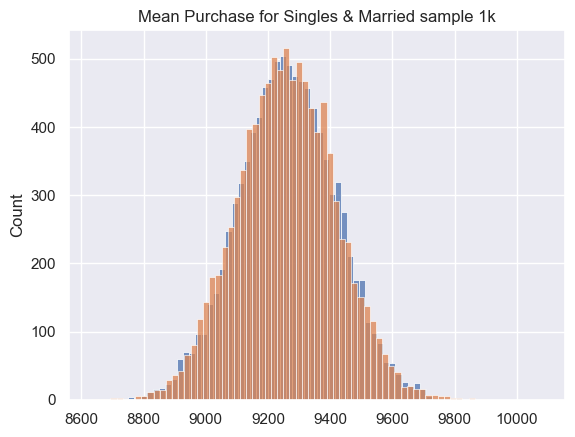

In [77]:
# Create the Gaussian distribution graph when we have 10k samples of 1k sample size

plt.title('Mean Purchase for Singles & Married sample 1k')
sns.histplot(sample_single_list_1k)
sns.histplot(sample_married_list_1k)
plt.show()

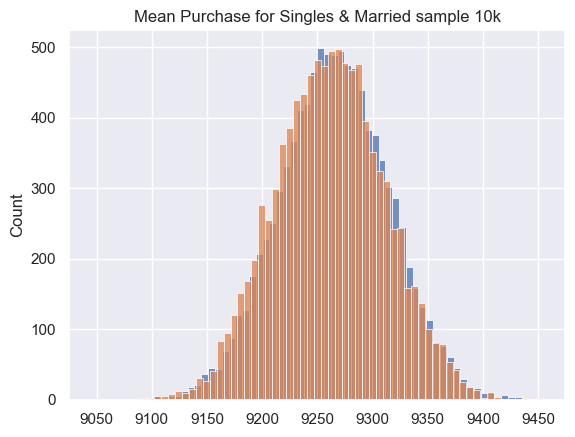

In [78]:
# Create the Gaussian distribution graph when we have 10k samples of 10k sample size

plt.title('Mean Purchase for Singles & Married sample 10k')
sns.histplot(sample_single_list_10k)
sns.histplot(sample_married_list_10k)
plt.show()

- As per our analysis, the confidence interval for purchase value will completely overlap for singles and married.
- By this analysis, we can confirm that the purchase per transaction does is not impacted by marital status.

# 4e. Results when the same activity is performed for Age

In [80]:
# Create a list of purchases categorized by the age bracket

purchase_list_0_17=np.array(df[df['Age']=='0-17']['Purchase'])
purchase_list_18_25=np.array(df[df['Age']=='18-25']['Purchase'])
purchase_list_26_35=np.array(df[df['Age']=='26-35']['Purchase'])
purchase_list_36_45=np.array(df[df['Age']=='36-45']['Purchase'])
purchase_list_46_50=np.array(df[df['Age']=='46-50']['Purchase'])
purchase_list_51_55=np.array(df[df['Age']=='51-55']['Purchase'])
purchase_list_55=np.array(df[df['Age']=='55+']['Purchase'])

In [81]:
# Calculate the mean purchase value for different age brackets

a=round(np.mean(purchase_list_0_17),0)
b=round(np.mean(purchase_list_18_25),0)
c=round(np.mean(purchase_list_26_35),0)
d=round(np.mean(purchase_list_36_45),0)
e=round(np.mean(purchase_list_46_50),0)
f=round(np.mean(purchase_list_51_55),0)
g=round(np.mean(purchase_list_55),0)
print(f"The average purchase value of a transaction done by customers from age group 0-17 is {a}")
print(f"The average purchase value of a transaction done by customers from age group 18-25 is {b}")
print(f"The average purchase value of a transaction done by customers from age group 26-35 is {c}")
print(f"The average purchase value of a transaction done by customers from age group 36-45 is {d}")
print(f"The average purchase value of a transaction done by customers from age group 46-50 is {e}")
print(f"The average purchase value of a transaction done by customers from age group 51-55 is {f}")
print(f"The average purchase value of a transaction done by customers from age group 55+ is {g}")
print()
if ((a>b) and (a>c) and (a>d) and (a>e) and (a>f) and (a>g)):
    print("Customers from age group 0-17 are spending more than other age groups per transaction")
elif ((b>a) and (b>c) and (b>d) and (b>e) and (b>f) and (b>g)):
    print("Customers from age group 18-25 are spending more than other age groups per transaction")
elif ((c>a) and (c>b) and (c>d) and (c>e) and (c>f) and (c>g)):
    print("Customers from age group 26-35 are spending more than other age groups per transaction")
elif ((d>a) and (d>b) and (d>c) and (b>e) and (b>f) and (b>g)):
    print("Customers from age group 36-45 are spending more than other age groups per transaction")
elif ((e>a) and (e>b) and (e>c) and (e>d) and (e>f) and (e>g)):
    print("Customers from age group 46-50 are spending more than other age groups per transaction")
elif ((f>a) and (f>b) and (f>c) and (f>d) and (f>e) and (f>g)):
    print("Customers from age group 51-55 are spending more than other age groups per transaction")
elif ((g>a) and (g>b) and (g>c) and (g>d) and (g>e) and (g>f)):
    print("Customers from age group 55+ are spending more than other age groups per transaction")

The average purchase value of a transaction done by customers from age group 0-17 is 8933.0
The average purchase value of a transaction done by customers from age group 18-25 is 9170.0
The average purchase value of a transaction done by customers from age group 26-35 is 9253.0
The average purchase value of a transaction done by customers from age group 36-45 is 9331.0
The average purchase value of a transaction done by customers from age group 46-50 is 9209.0
The average purchase value of a transaction done by customers from age group 51-55 is 9535.0
The average purchase value of a transaction done by customers from age group 55+ is 9336.0

Customers from age group 51-55 are spending more than other age groups per transaction


The mean purchase value for 10k samples of size 10k for age group 0-17 is 8933.04

The 99% confidence interval when taking above sample for age group 0-17 is 8815.81 to 9057.14

The 95% confidence interval when taking above sample for age group 0-17 is 8849.68 to 9019.55

The 90% confidence interval when taking above sample for age group 0-17 is 8868.58 to 8998.26



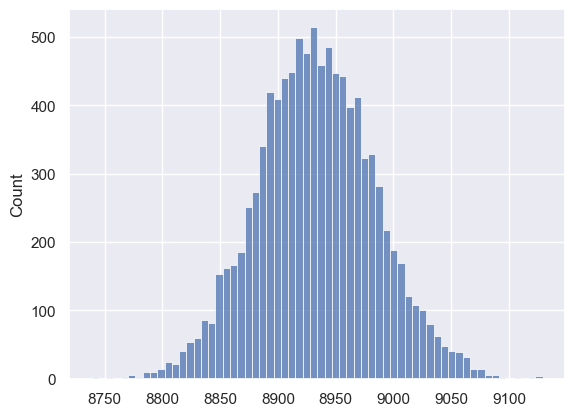

In [82]:
# Create a list for age group 0-17 using 10k samples with sample size 10k and calculate mean

sample_0_17_list_10k=calcmean(n=10000,samples=10000,purchase_list=purchase_list_0_17)
mean_0_17=round(np.mean(sample_0_17_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for age group 0-17 is {mean_0_17}")
print()
conf_lower=round(np.percentile(sample_0_17_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_0_17_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for age group 0-17 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_0_17_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_0_17_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for age group 0-17 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_0_17_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_0_17_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for age group 0-17 is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_0_17_list_10k)
plt.show()

The mean purchase value for 10k samples of size 10k for age group 0-17 is 9169.69

The 99% confidence interval when taking above sample for age group 18-25 is 9052.42 to 9287.99

The 95% confidence interval when taking above sample for age group 18-25 is 9085.1 to 9252.82

The 90% confidence interval when taking above sample for age group 18-25 is 9104.49 to 9234.57



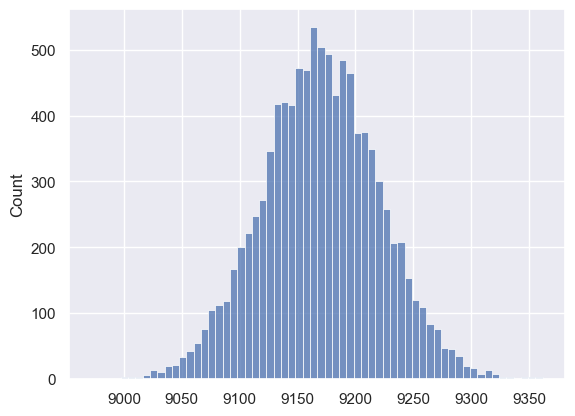

In [83]:
# Create a list for age group 18-25 using 10k samples with sample size 10k and calculate mean

sample_18_25_list_10k=calcmean(n=10000,samples=10000,purchase_list=purchase_list_18_25)
mean_18_25=round(np.mean(sample_18_25_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for age group 0-17 is {mean_18_25}")
print()
conf_lower=round(np.percentile(sample_18_25_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_18_25_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for age group 18-25 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_18_25_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_18_25_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for age group 18-25 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_18_25_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_18_25_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for age group 18-25 is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_18_25_list_10k)
plt.show()

The mean purchase value for 10k samples of size 10k for age group 26-35 is 9252.83

The 99% confidence interval when taking above sample for age group 26-35 is 9134.27 to 9367.18

The 95% confidence interval when taking above sample for age group 26-35 is 9169.17 to 9334.96

The 90% confidence interval when taking above sample for age group 26-35 is 9188.56 to 9317.1



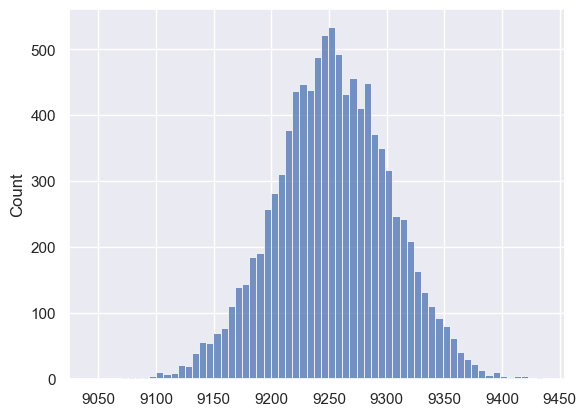

In [84]:
# Create a list for age group 26-35 using 10k samples with sample size 10k and calculate mean

sample_26_35_list_10k=calcmean(n=10000,samples=10000,purchase_list=purchase_list_26_35)
mean_26_35=round(np.mean(sample_26_35_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for age group 26-35 is {mean_26_35}")
print()
conf_lower=round(np.percentile(sample_26_35_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_26_35_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for age group 26-35 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_26_35_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_26_35_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for age group 26-35 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_26_35_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_26_35_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for age group 26-35 is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_26_35_list_10k)
plt.show()

The mean purchase value for 10k samples of size 10k for age group 36-45 is 9330.95

The 99% confidence interval when taking above sample for age group 36-45 is 9217.29 to 9445.51

The 95% confidence interval when taking above sample for age group 36-45 is 9248.27 to 9411.81

The 90% confidence interval when taking above sample for age group 36-45 is 9266.5 to 9394.75



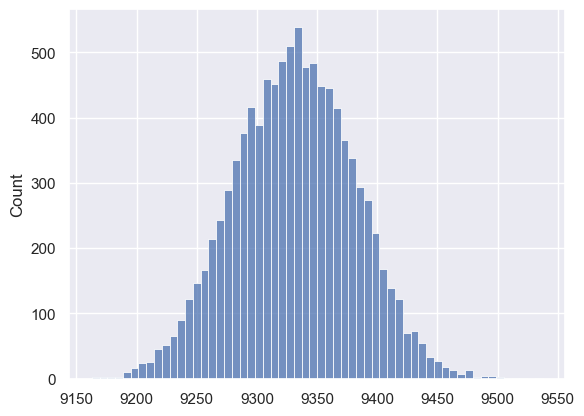

In [85]:
# Create a list for age group 36-45 using 10k samples with sample size 10k and calculate mean

sample_36_45_list_10k=calcmean(n=10000,samples=10000,purchase_list=purchase_list_36_45)
mean_36_45=round(np.mean(sample_36_45_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for age group 36-45 is {mean_36_45}")
print()
conf_lower=round(np.percentile(sample_36_45_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_36_45_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for age group 36-45 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_36_45_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_36_45_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for age group 36-45 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_36_45_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_36_45_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for age group 36-45 is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_36_45_list_10k)
plt.show()

The mean purchase value for 10k samples of size 10k for age group 46-50 is 9208.68

The 99% confidence interval when taking above sample for age group 46-50 is 9096.16 to 9323.73

The 95% confidence interval when taking above sample for age group 46-50 is 9129.31 to 9289.51

The 90% confidence interval when taking above sample for age group 46-50 is 9146.13 to 9271.42



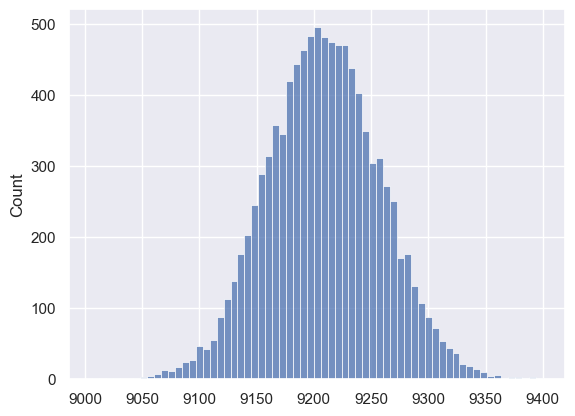

In [86]:
# Create a list for age group 46-50 using 10k samples with sample size 10k and calculate mean

sample_46_50_list_10k=calcmean(n=10000,samples=10000,purchase_list=purchase_list_46_50)
mean_46_50=round(np.mean(sample_46_50_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for age group 46-50 is {mean_46_50}")
print()
conf_lower=round(np.percentile(sample_46_50_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_46_50_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for age group 46-50 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_46_50_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_46_50_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for age group 46-50 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_46_50_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_46_50_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for age group 46-50 is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_46_50_list_10k)
plt.show()

The mean purchase value for 10k samples of size 10k for age group 51-55 is 9536.03

The 99% confidence interval when taking above sample for age group 51-55 is 9418.64 to 9653.02

The 95% confidence interval when taking above sample for age group 51-55 is 9452.32 to 9618.93

The 90% confidence interval when taking above sample for age group 51-55 is 9471.64 to 9599.61



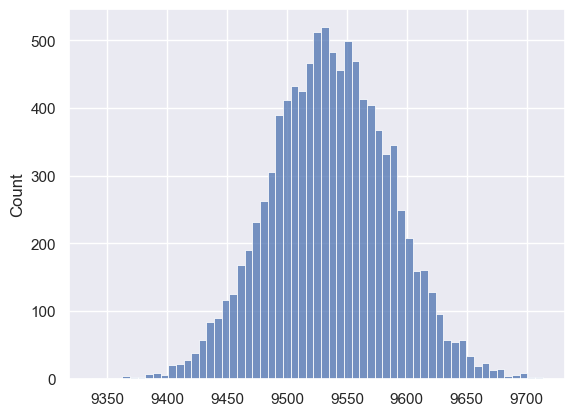

In [87]:
# Create a list for age group 51-55 using 10k samples with sample size 10k and calculate mean

sample_51_55_list_10k=calcmean(n=10000,samples=10000,purchase_list=purchase_list_51_55)
mean_51_55=round(np.mean(sample_51_55_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for age group 51-55 is {mean_51_55}")
print()
conf_lower=round(np.percentile(sample_51_55_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_51_55_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for age group 51-55 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_51_55_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_51_55_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for age group 51-55 is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_51_55_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_51_55_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for age group 51-55 is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_51_55_list_10k)
plt.show()

The mean purchase value for 10k samples of size 10k for age group 55+ is 9335.62

The 99% confidence interval when taking above sample for age group 55+ is 9220.54 to 9451.96

The 95% confidence interval when taking above sample for age group 55+ is 9252.81 to 9419.12

The 90% confidence interval when taking above sample for age group 55+ is 9271.37 to 9401.15



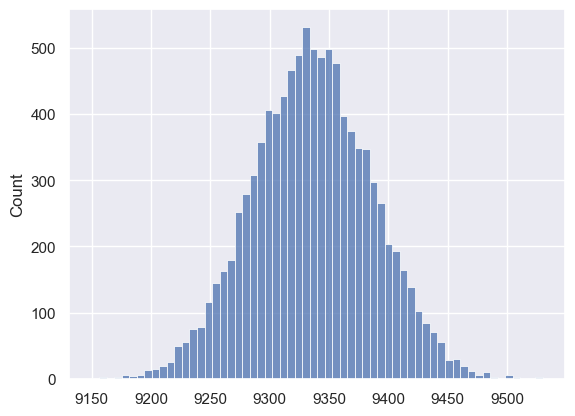

In [88]:
# Create a list for age group 55+ using 10k samples with sample size 10k and calculate mean

sample_55_list_10k=calcmean(n=10000,samples=10000,purchase_list=purchase_list_55)
mean_55=round(np.mean(sample_55_list_10k),2)
print(f"The mean purchase value for 10k samples of size 10k for age group 55+ is {mean_55}")
print()
conf_lower=round(np.percentile(sample_55_list_10k,1.0),2)
conf_upper=round(np.percentile(sample_55_list_10k,99.0),2)
print(f"The 99% confidence interval when taking above sample for age group 55+ is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_55_list_10k,5.0),2)
conf_upper=round(np.percentile(sample_55_list_10k,95.0),2)
print(f"The 95% confidence interval when taking above sample for age group 55+ is {conf_lower} to {conf_upper}")
print()
conf_lower=round(np.percentile(sample_55_list_10k,10.0),2)
conf_upper=round(np.percentile(sample_55_list_10k,90.0),2)
print(f"The 90% confidence interval when taking above sample for age group 55+ is {conf_lower} to {conf_upper}")
print()

sns.histplot(sample_55_list_10k)
plt.show()

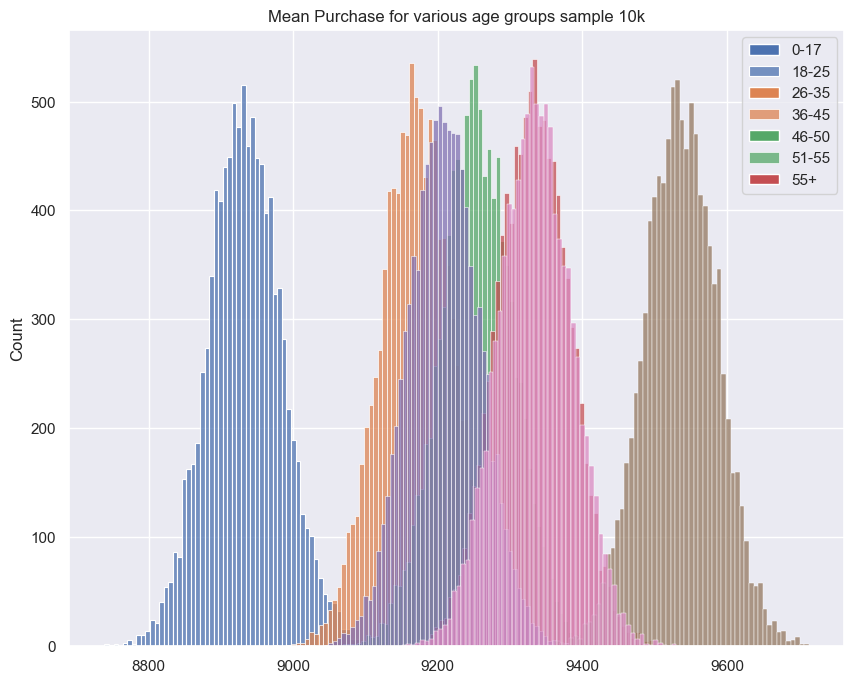

In [96]:
# Create the Gaussian distribution graph when we have 10k samples of 10k sample size

plt.figure(figsize=[10,8])
plt.title('Mean Purchase for various age groups sample 10k')
sns.histplot(sample_0_17_list_10k)
sns.histplot(sample_18_25_list_10k)
sns.histplot(sample_26_35_list_10k)
sns.histplot(sample_36_45_list_10k)
sns.histplot(sample_46_50_list_10k)
sns.histplot(sample_51_55_list_10k)
sns.histplot(sample_55_list_10k)
plt.legend(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],loc="upper right")
plt.show()

- Customers from age group 51-55 are spending more than other age groups per transaction.
- The mean for sample size of 10k is very close to the actual mean.
- The number of transactions done by customers in 51-55 age are very less compared to others but the average transaction value is high which indicates that they are buying expensive products.

# 5. Final Insights

- Males have done 75% of the total transactions. The mean purchase value per transaction for male is greater than females by 700.
- With 95% confidence interval, we can confirm that the mean purchase value for the women population would be 8657 to 8814.
- With 95% confidence interval, we can confirm that the mean purchase value for the men population would be 9354 to 9523.
- As seen, there is no overlap indicating a clear gap between the male and female customer behavior.
   
- Customers whose marital status is 'Single' have done 60% of the total transactions. Though the mean purchase value is same for both the categories.
- With 95% confidence interval, we can confirm that the mean purchase value for 'Single' customer population would be 9183 to 9347.
- With 95% confidence interval, we can confirm that the mean purchase value for 'married' customers population would be 9180 to 9344.
- As seen, there is complete overlap indicating no difference in behavior of customers based on marital status.
   
- Customers in the age bracket of 26-35 are doing the maximum transactions. Though the mean purchase value of customers in age bracket of 51-55 is higher followed by 55+.
  This indicates that customers who are more than 50 years old are spending more on each transaction than the teens or adults.
- Customers in the age bracket of 26 to 50 have almost similar mean purchase value per transaction as their confidence interval overlaps each other.

# 6. Recommendations

- More promotional offers and products should be added for women so that the purchase value per transaction is up
  and we can see an increase in transactions done by them.
- Customers who are more than 50 years old are spending more per transaction. Customers who are 26-35 and 36-45
  have done lower purchase transactions than the seniors. Therefore, adults should be targeted more with
  more product options.
- Customers from city category 'A' have done the lowest number of transaction and the mean purchase value is also
  lower than other city categories. Management should look to add more stores (offline) or reduce delivery time (online)
  in 'A' so that more customers can shop from Walmart.
- Some of the product categories like 12,13,19 and 20 have very low sales. These products should be analysed to see
  how they should be promoted in a better way to increase sales.
- Customers who are new to the city (stay is less than 1 year) have done the least number of transactions.
  These customers should be given product options which would help them to accomodate better in the city and thereby sales
  for this group would increase.